In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Dataset.csv')
train.head()

,Unnamed: 0,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Severity
0,4580,34.063927,15,43,61.394713,0.292673,78.70,7,37917.179706,2,0.003512,6610,Significant_Damage_And_Serious_Injuries
1,1406,61.278539,10,3,79.307201,0.310343,84.53,2,60869.748698,2,0.777802,7800,Minor_Damage_And_Injuries
2,1964,58.721461,14,7,75.205105,0.249398,88.93,7,23410.342289,4,0.002406,8293,Significant_Damage_And_Fatalities
3,7497,50.273973,17,7,47.721057,0.504718,81.35,7,32473.864212,3,0.003312,510,Significant_Damage_And_Serious_Injuries
4,43,46.255708,7,2,67.502279,0.269233,75.35,4,38277.020160,0,0.070480,4445,Highly_Fatal_And_Damaging


In [3]:
test=pd.read_csv('x_test.csv')
test.head()


,Unnamed: 0,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,2390,80.593607,8,11,62.534184,0.409514,82.45,2,29304.824298,2,0.395623,960
1,6803,41.917808,12,1,56.198724,0.413481,79.64,7,42176.922286,2,0.003973,9315
2,3226,43.333333,15,4,49.817685,0.408432,82.66,2,36091.552772,3,0.490557,7411
3,8630,26.073059,21,0,65.496809,0.363354,82.92,4,26977.613452,1,0.049470,12309
4,4898,32.876712,11,9,62.670921,0.443773,85.40,3,46847.458386,0,0.231088,7969


In [4]:
train.isnull().sum()

Unnamed: 0                 0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
Severity                   0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
test.isnull().sum()

Unnamed: 0                 0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [7]:
test.duplicated().sum()

0

<AxesSubplot:>

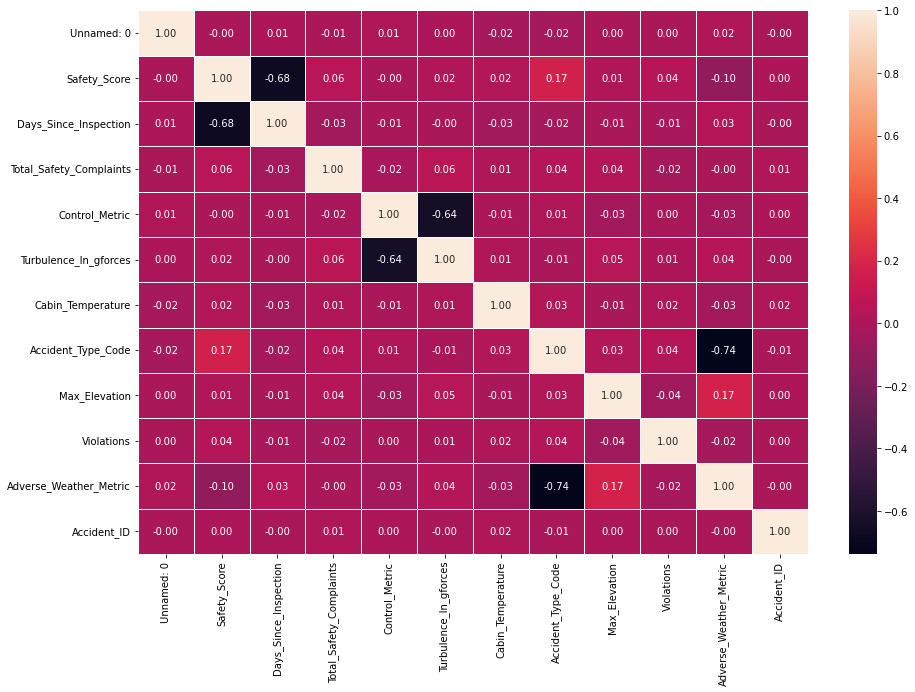

In [8]:
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',linewidth=1)

# THE MAIN AIM : WHAT IS THE REASONS THE ACCIDENT?

In [9]:
# WHICH ACCIDENT HAS CABIN TEMPRETURE MORE THAN MEAN?
mean= train['Cabin_Temperature'].mean()
train[train['Cabin_Temperature']<=mean]['Accident_ID']

0        6610
4        4445
6        5313
7        5582
8        4416
        ...  
8493    11013
8494     9662
8497     1891
8498     5266
8499     8330
Name: Accident_ID, Length: 4855, dtype: int64

In [10]:
# WHICH ACCIDENT HAS Adverse_Weather_Metric MORE THAN MEAN?
mean= train['Adverse_Weather_Metric'].mean()
train[train['Adverse_Weather_Metric']<=mean]['Accident_ID']

0        6610
2        8293
3         510
4        4445
6        5313
        ...  
8493    11013
8495     9446
8496     2412
8497     1891
8499     8330
Name: Accident_ID, Length: 6082, dtype: int64

In [11]:
# WHICH ACCIDENT HAS Safety_Score MORE THAN MEAN?
mean= train['Safety_Score'].mean()
train[train['Safety_Score']<=mean]['Accident_ID']

0       6610
7       5582
8       4416
10      6591
11      1130
        ... 
8492    9129
8494    9662
8496    2412
8498    5266
8499    8330
Name: Accident_ID, Length: 4396, dtype: int64

In [12]:
train.groupby('Accident_ID').agg({'Days_Since_Inspection':'sum'}).sort_values('Days_Since_Inspection', ascending = False)

,Days_Since_Inspection
Accident_ID,
12254,23
205,23
4017,23
9000,23
12458,23
...,...
9705,1
5430,1
361,1


In [13]:
#HOW MANY COMPLAINTS IN THE ACCIDENT? 
train.groupby('Accident_ID').agg({'Total_Safety_Complaints':'sum'}).sort_values('Total_Safety_Complaints', ascending = False)

,Total_Safety_Complaints
Accident_ID,
5789,54
551,54
12194,54
8508,54
10403,54
...,...
1820,0
5992,0
3293,0


In [14]:
#HOW MANY Violations IN THE ACCIDENT? 
train.groupby('Accident_ID').agg({'Violations':'sum'}).sort_values('Violations', ascending = False)

,Violations
Accident_ID,
10855,5
2931,5
1914,5
12227,5
12232,5
...,...
4509,0
1363,0
8095,0


In [15]:
#HOW MANY Violations?
train.groupby('Accident_ID').agg({'Violations':'sum'}).sort_values('Violations', ascending = False).sum()

Violations    17008
dtype: int64

In [16]:
train.shape

(8500, 13)

In [17]:
train.drop(['Accident_ID'],axis=1,inplace=True)
test.drop(['Accident_ID'],axis=1,inplace=True)

train.drop(['Unnamed: 0'],axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis=1,inplace=True)


In [18]:
train.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity
0,34.063927,15,43,61.394713,0.292673,78.70,7,37917.179706,2,0.003512,Significant_Damage_And_Serious_Injuries
1,61.278539,10,3,79.307201,0.310343,84.53,2,60869.748698,2,0.777802,Minor_Damage_And_Injuries
2,58.721461,14,7,75.205105,0.249398,88.93,7,23410.342289,4,0.002406,Significant_Damage_And_Fatalities
3,50.273973,17,7,47.721057,0.504718,81.35,7,32473.864212,3,0.003312,Significant_Damage_And_Serious_Injuries
4,46.255708,7,2,67.502279,0.269233,75.35,4,38277.020160,0,0.070480,Highly_Fatal_And_Damaging


In [19]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,80.593607,8,11,62.534184,0.409514,82.45,2,29304.824298,2,0.395623
1,41.917808,12,1,56.198724,0.413481,79.64,7,42176.922286,2,0.003973
2,43.333333,15,4,49.817685,0.408432,82.66,2,36091.552772,3,0.490557
3,26.073059,21,0,65.496809,0.363354,82.92,4,26977.613452,1,0.049470
4,32.876712,11,9,62.670921,0.443773,85.40,3,46847.458386,0,0.231088


<AxesSubplot:>

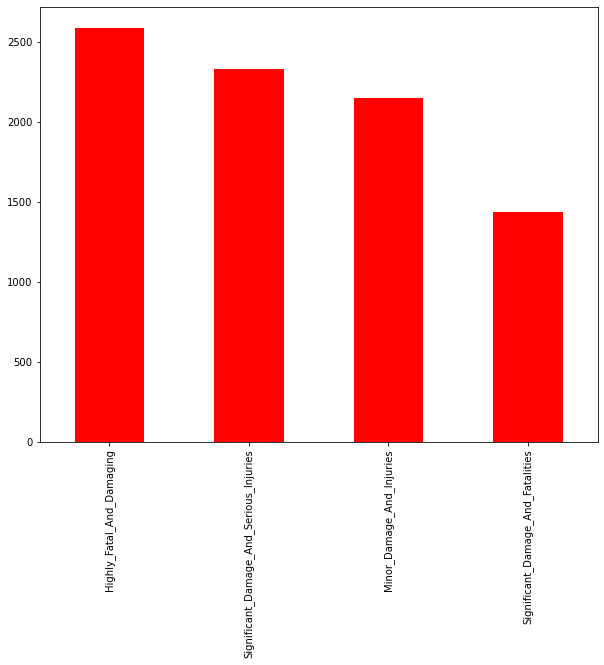

In [20]:
plt.figure(figsize=(10,8))
train['Severity'].value_counts().plot(kind='bar',color='red')

In [21]:
train.Severity.replace('Highly_Fatal_And_Damaging', 0, inplace=True)
train.Severity.replace('Significant_Damage_And_Serious_Injuries', 1, inplace=True)
train.Severity.replace('Minor_Damage_And_Injuries', 2, inplace=True)
train.Severity.replace('Significant_Damage_And_Fatalities', 3, inplace=True)

train.head()


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity
0,34.063927,15,43,61.394713,0.292673,78.70,7,37917.179706,2,0.003512,1
1,61.278539,10,3,79.307201,0.310343,84.53,2,60869.748698,2,0.777802,2
2,58.721461,14,7,75.205105,0.249398,88.93,7,23410.342289,4,0.002406,3
3,50.273973,17,7,47.721057,0.504718,81.35,7,32473.864212,3,0.003312,1
4,46.255708,7,2,67.502279,0.269233,75.35,4,38277.020160,0,0.070480,0


## Training

In [22]:
from sklearn.model_selection import train_test_split

x = train.drop('Severity',axis=1)
y = train['Severity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [23]:
x.shape

(8500, 10)

In [24]:
y.shape

(8500,)

In [25]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=60)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=60)

In [26]:
y_pred = tree.predict(x_test)
y_pred

array([0, 0, 2, ..., 3, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[595  22  15   9]
 [ 24 553  19  10]
 [ 14   9 491   8]
 [ 14   4  15 323]]


In [28]:
print('Accuracy of Decision Tree data : ', accuracy_score(y_test, y_pred))

Accuracy of Decision Tree data :  0.9232941176470588


In [29]:
#RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, random_state =22,criterion="entropy")
RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=22)

In [30]:
y_pred = RFC.predict(x_test)
y_pred

array([0, 0, 2, ..., 3, 1, 1], dtype=int64)

In [31]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[603  11  18   9]
 [ 14 570  20   2]
 [ 14   5 496   7]
 [  4   5  14 333]]


In [32]:
print('Accuracy of Random Forest data : ', accuracy_score(y_test, y_pred))

Accuracy of Random Forest data :  0.9421176470588235


In [33]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(learning_rate=0.7,n_estimators=270)
GBC.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=270)

In [34]:
y_pred = GBC.predict(x_test)
y_pred

array([0, 0, 2, ..., 3, 1, 1], dtype=int64)

In [35]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[604  11  17   9]
 [  9 580  12   5]
 [  8   8 503   3]
 [  4   4   5 343]]


In [36]:
print('Accuracy of Gradient Boosting data : ', accuracy_score(y_test, y_pred))

Accuracy of Gradient Boosting data :  0.9552941176470588


In [37]:
#LogisticRegression


from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\pesho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 3, 0, 2], dtype=int64)

In [39]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[418  94  99  30]
 [242 195 137  32]
 [109 154 228  31]
 [125  58 149  24]]


In [40]:
print('Accuracy of Logistic Regression data : ', accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression data :  0.40705882352941175


In [405]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=3000)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3000)

In [406]:
y_pred = KNN.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [407]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[656   0   0   0]
 [588   0   0   0]
 [531   0   0   0]
 [350   0   0   0]]


In [408]:
print('Accuracy of K-Nearest Neighbors  data : ', accuracy_score(y_test, y_pred))

Accuracy of K-Nearest Neighbors  data :  0.30870588235294116


In [409]:
#  Gaussian Naive Bayes classifier:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [410]:
y_pred =GNB.predict(x_test)
y_pred

array([0, 1, 1, ..., 2, 3, 3], dtype=int64)

In [411]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[343 206  86  21]
 [157 304  81  46]
 [ 88 151 261  31]
 [ 94 133  56  67]]


In [412]:
print('Accuracy of Gaussian Naive Bayes  data : ', accuracy_score(y_test, y_pred))

Accuracy of Gaussian Naive Bayes  data :  0.4588235294117647


In [413]:
#Support Vector Machine

from sklearn import svm
sv = svm.SVC()
sv.fit(x_train, y_train)

SVC()

In [414]:
y_pred =sv.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [418]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[656   0   0   0]
 [588   0   0   0]
 [531   0   0   0]
 [350   0   0   0]]


In [420]:
print('Accuracy of Support Vector Machine  data : ', accuracy_score(y_test, y_pred))

Accuracy of Support Vector Machine  data :  0.30870588235294116


In [421]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LD = LinearDiscriminantAnalysis()
LD.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [422]:
y_pred =LD.predict(x_test)
y_pred

array([0, 3, 0, ..., 2, 3, 3], dtype=int64)

In [423]:
print('Accuracy of Support Vector Machine  data : ', accuracy_score(y_test, y_pred))

Accuracy of Support Vector Machine  data :  0.6517647058823529


## Testing

In [427]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,80.593607,8,11,62.534184,0.409514,82.45,2,29304.824298,2,0.395623
1,41.917808,12,1,56.198724,0.413481,79.64,7,42176.922286,2,0.003973
2,43.333333,15,4,49.817685,0.408432,82.66,2,36091.552772,3,0.490557
3,26.073059,21,0,65.496809,0.363354,82.92,4,26977.613452,1,0.049470
4,32.876712,11,9,62.670921,0.443773,85.40,3,46847.458386,0,0.231088


In [428]:
##We will use  GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

Ty = train["Severity"]
features = ["Safety_Score", "Days_Since_Inspection", "Total_Safety_Complaints", "Control_Metric", "Turbulence_In_gforces", "Cabin_Temperature", "Accident_Type_Code","Max_Elevation","Violations","Adverse_Weather_Metric"]

X = pd.get_dummies(train[features])

X_test = pd.get_dummies(test[features]) #هنا انا بعتت لل var  الداتا بتاعت ال test

model =GradientBoostingClassifier(learning_rate=0.7,n_estimators=270)
model.fit(X, Ty)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=270)

In [429]:
predictions = model.predict(X_test)
predictions

array([3, 2, 0, ..., 3, 0, 3], dtype=int64)

In [431]:
df=pd.DataFrame({"Severity":predictions})
df.Severity.replace(0, 'Highly_Fatal_And_Damaging',inplace=True)
df.Severity.replace(1,'Significant_Damage_And_Serious_Injuries', inplace=True)
df.Severity.replace(2,'Minor_Damage_And_Injuries', inplace=True)
df.Severity.replace(3,'Significant_Damage_And_Fatalities', inplace=True)


In [432]:
df=pd.DataFrame({"Severity":predictions})
df.to_csv("Output.csv")